In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [2]:
digits = load_digits() # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [4]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

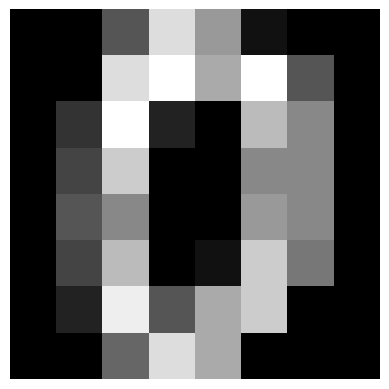

In [6]:
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

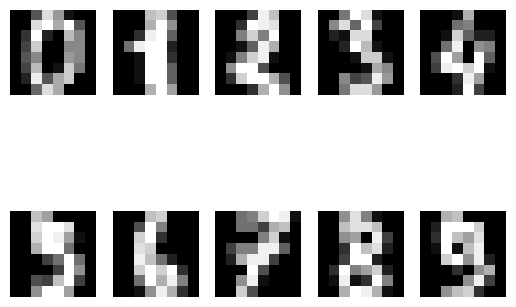

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다.
plt.show()

In [8]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# 각 Label을 참조하여, 해당 이미지가 나타내는 숫자가 3이라면 3을 할당한 후, 3이 아니라면 0을 할당하여 새로운 칼럼 new_label을 생성.
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)


# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=15) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [15]:
fake_pred = [0] * len(y_pred) # 0으로만 이루어진 가짜 답안지 준비

accuracy = accuracy_score(y_test, fake_pred) # fake_pred(가짜 답안지)를 y_test(정답지)로 채점
accuracy # 정확도 출력

0.925

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]], dtype=int64)

In [19]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [21]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



In [22]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)